# Step 3 - Analyzing Data using Python

This notebook takes in the three JSON files produced by the Step 2 notebook and uses the data within them to make vizualizations that allow us to better understand the data 

## Taking in Data as DataFrames

This first section simply imports the three JSON files and converts them into DataFrames in preparation for the next parts.

In [2]:
import json
import pandas as pd 

#This first section takes in the raw JSON in the three files
file = open('refined_data/academy_monthly_desktop_start201507-end202303.json')
raw_desktop_json = json.load(file)
file.close()

file = open('refined_data/academy_monthly_mobile_start201507-end202303.json')
raw_mobile_json = json.load(file)
file.close()

file = open('refined_data/academy_monthly_cumulative_start201507-end202303.json')
raw_cume_json = json.load(file)
file.close()


#This section converts the JSON into Pandas DataFrames, a more convenient format
#for making vizualizations 
desktop_df = []
for individual_film_entries in raw_desktop_json.values():
    desktop_df.extend(individual_film_entries)
desktop_df = pd.DataFrame.from_dict(desktop_df)

mobile_df = []
for individual_film_entries in raw_mobile_json.values():
    mobile_df.extend(individual_film_entries)
mobile_df = pd.DataFrame.from_dict(mobile_df)

cume_df = []
for individual_film_entries in raw_cume_json.values():
    cume_df.extend(individual_film_entries)
cume_df = pd.DataFrame.from_dict(cume_df)


##Quick sanity check to make sure the data seems formatted correctly
desktop_df.head()
mobile_df.head()
cume_df.head()

,project,article,granularity,timestamp,agent,views
0,en.wikipedia,12_Years_a_Slave_(film),monthly,2015070100,user,138151
1,en.wikipedia,12_Years_a_Slave_(film),monthly,2015080100,user,122993
2,en.wikipedia,12_Years_a_Slave_(film),monthly,2015090100,user,113032
3,en.wikipedia,12_Years_a_Slave_(film),monthly,2015100100,user,127223
4,en.wikipedia,12_Years_a_Slave_(film),monthly,2015110100,user,128317


## First visualization: Maximum Average and Minimum Average 

These next two cells create a visualization that contains a time series for the articles that have the highest average monthly page requests and the lowest average monthly page requests for desktop access and mobile access.

In [3]:
#Aggregating the desktop and mobile DataFrames into Average view counts.
desktop_views_sort_agg = desktop_df.groupby('article')['views'].agg('mean').sort_values(ascending=True)
mobile_views_sort_agg = mobile_df.groupby('article')['views'].agg('mean').sort_values(ascending=True)
desktop_views_sort_agg = pd.DataFrame(data = {"name" : desktop_views_sort_agg.axes[0].tolist(),"views": desktop_views_sort_agg.tolist()})
mobile_views_sort_agg = pd.DataFrame(data = {"name" : mobile_views_sort_agg.axes[0].tolist(),"views": mobile_views_sort_agg.tolist()})

#Grabs the names of the films with max/min views on Desktop and Mobile
film_min_desktop_views = desktop_views_sort_agg.iloc[0]['name']
film_max_desktop_views = desktop_views_sort_agg.iloc[desktop_views_sort_agg.shape[0] - 1]['name']
film_min_mobile_views = mobile_views_sort_agg.iloc[0]['name']
film_max_mobile_views = mobile_views_sort_agg.iloc[mobile_views_sort_agg.shape[0] - 1]['name']

#Filters out the DataFrames to  only have data for those films
min_desktop_views_timeseries_data = desktop_df[desktop_df['article'] == film_min_desktop_views]
max_desktop_views_timeseries_data = desktop_df[desktop_df['article'] == film_max_desktop_views]
min_mobile_views_timeseries_data = mobile_df[mobile_df['article'] == film_min_mobile_views]
max_mobile_views_timeseries_data = mobile_df[mobile_df['article'] == film_max_mobile_views]

#Simplifies the DataFrames into only the necessary columns
min_desktop_views_timeseries_data = pd.DataFrame(data = {
    "article": min_desktop_views_timeseries_data['article'],
    "views": min_desktop_views_timeseries_data['views'],
    "timestamp": min_desktop_views_timeseries_data['timestamp'],
    "label": "min-desktop"
})

max_desktop_views_timeseries_data = pd.DataFrame(data = {
    "article": max_desktop_views_timeseries_data['article'],
    "views": max_desktop_views_timeseries_data['views'],
    "timestamp": max_desktop_views_timeseries_data['timestamp'],
    "label": "max-desktop"
})

min_mobile_views_timeseries_data = pd.DataFrame(data = {
    "article": min_mobile_views_timeseries_data['article'],
    "views": min_mobile_views_timeseries_data['views'],
    "timestamp": min_mobile_views_timeseries_data['timestamp'],
    "label": "min-mobile"
})

max_mobile_views_timeseries_data = pd.DataFrame(data = {
    "article": max_mobile_views_timeseries_data['article'],
    "views": max_mobile_views_timeseries_data['views'],
    "timestamp": max_mobile_views_timeseries_data['timestamp'],
    "label": "max-mobile"
})

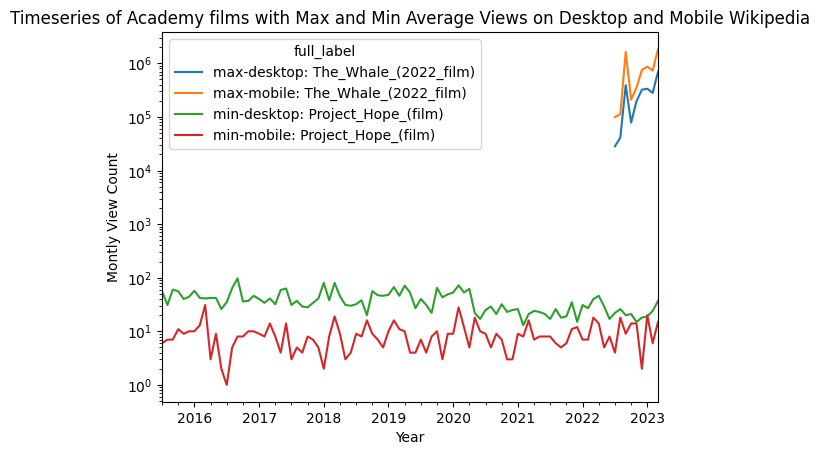

In [4]:
import matplotlib.pyplot as plt

#Combines all the data for this viz into one DataFrame
#for use with pyplot
timeseries_data = pd.concat([
    min_mobile_views_timeseries_data, 
    max_mobile_views_timeseries_data, 
    min_desktop_views_timeseries_data, 
    max_desktop_views_timeseries_data], axis=0)

#Creates the final label to be used on our legend
timeseries_data['timestamp'] = pd.to_datetime(timeseries_data['timestamp'], format='%Y%m%d%H')
timeseries_data['full_label'] = timeseries_data['label'] + ": " + timeseries_data['article']
timeseries_data

#Graphs our data and saves the result into a png
timeseries_data.pivot(index='timestamp', columns='full_label', values='views').plot()
plt.semilogy() # Transform Y-Axis to a Logarithmic Scale
plt.title('Timeseries of Academy films with Max and Min Average Views on Desktop and Mobile Wikipedia')
plt.xlabel('Year')
plt.ylabel('Montly View Count')
plt.savefig('vizualizations/minMaxAvgViewsTimeSeriesGraph.png', bbox_inches = "tight") 
plt.show()

## Second visualization: Top 10 Peak Page Views

This next cell creates a viz containing a time series for the top 10 article pages by largest (peak) page views over the entire time by access type.

C:\Users\ramir\AppData\Local\Temp\ipykernel_4724\3423175973.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  peak_desktop_movie_data['label'] = "desktop"
C:\Users\ramir\AppData\Local\Temp\ipykernel_4724\3423175973.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  peak_mobile_movie_data['label'] = "mobile"


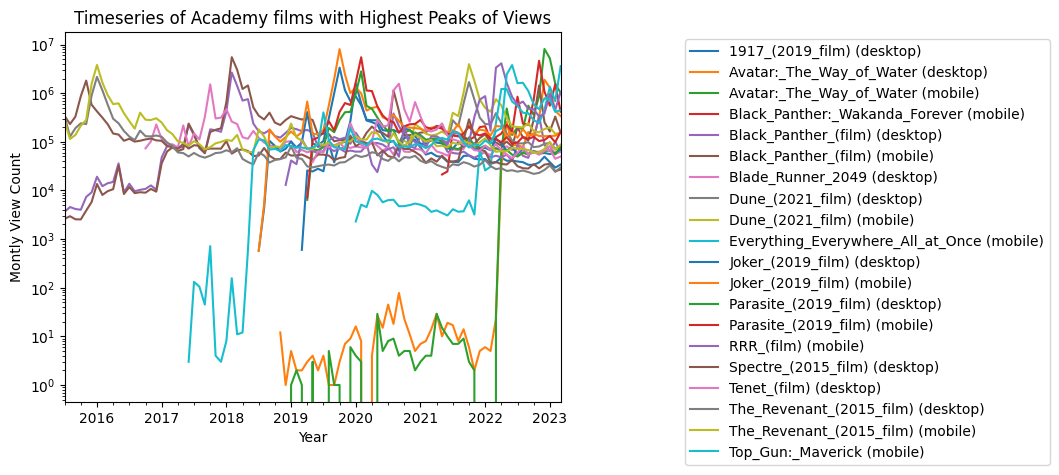

In [5]:
##Aggregates DFs on max views in a single month
desktop_peak_views = desktop_df.groupby('article')['views'].agg('max').sort_values(ascending=False)
mobile_peak_views = mobile_df.groupby('article')['views'].agg('max').sort_values(ascending=False)
desktop_peak_views = pd.DataFrame(data = {"name" : desktop_peak_views.axes[0].tolist(),"views": desktop_peak_views.tolist()})
mobile_peak_views = pd.DataFrame(data = {"name" : mobile_peak_views.axes[0].tolist(),"views": mobile_peak_views.tolist()})

#Grabs the list of films with the largest max views in a single month
peak_desktop_movies = desktop_peak_views['name'][0:10].tolist()
peak_mobile_movies = mobile_peak_views['name'][0:10].tolist()

##Filters the data to grab only lines for those movies
peak_desktop_movie_data = desktop_df[desktop_df['article'].isin(peak_desktop_movies)]
peak_desktop_movie_data['label'] = "desktop"
peak_mobile_movie_data = mobile_df[mobile_df['article'].isin(peak_mobile_movies)]
peak_mobile_movie_data['label'] = "mobile"

##Compiles the data into a single DataFrame for pyplot
timeseries_data = pd.concat([
    peak_desktop_movie_data, 
    peak_mobile_movie_data], axis=0)
timeseries_data['timestamp'] = pd.to_datetime(timeseries_data['timestamp'], format='%Y%m%d%H')
timeseries_data['full_label'] = timeseries_data['article'] + " (" +timeseries_data['label'] + ")"
timeseries_data

##Graphs the data and outputs the graph to a png
timeseries_data.pivot(index='timestamp', columns='full_label', values='views').plot()
plt.legend(bbox_to_anchor=(2,1))
plt.semilogy() # Transform Y-Axis to a Logarithmic Scale
plt.title('Timeseries of Academy films with Highest Peaks of Views')
plt.xlabel('Year')
plt.ylabel('Montly View Count')
plt.savefig('vizualizations/highestPeaksTimeSeriesGraph.png', bbox_inches = "tight")
plt.show()

## Third visualization: **<span lang="EN" style="font-size:11.0pt;font-family:&quot;Open Sans&quot;,sans-serif;mso-fareast-font-family:
&quot;Open Sans&quot;;mso-ansi-language:EN;mso-fareast-language:EN-US;mso-bidi-language:
AR-SA">Fewest Months of Data</span>**

This next cell creates a viz containing a time series for the 10 articles for each access type with the least months of data we have available

C:\Users\ramir\AppData\Local\Temp\ipykernel_4724\1877712111.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  least_months_desktop_movie_data['label'] = "desktop"
C:\Users\ramir\AppData\Local\Temp\ipykernel_4724\1877712111.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  least_months_mobile_movie_data['label'] = "mobile"


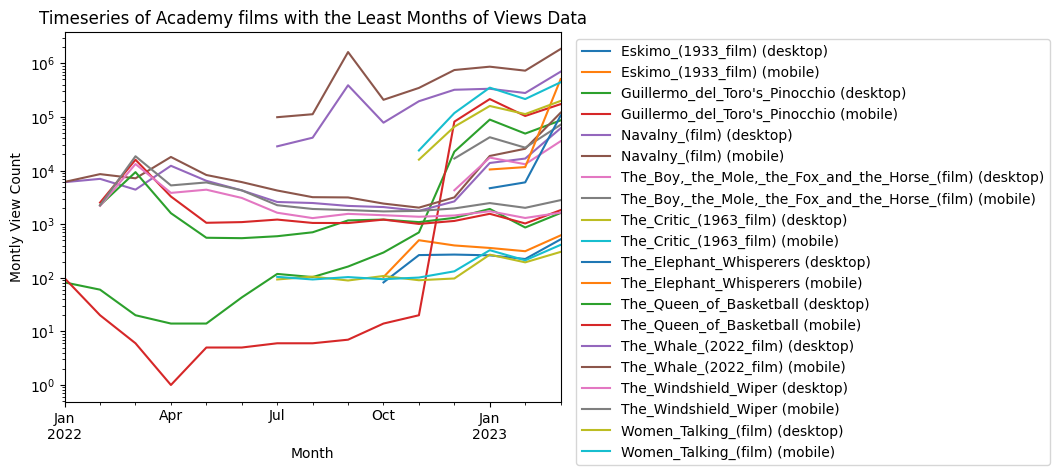

In [6]:
##Aggregates DFs on number of months for which we have Data
desktop_least_months = desktop_df.groupby('article')['views'].agg('count').sort_values(ascending=True)
mobile_least_months = mobile_df.groupby('article')['views'].agg('count').sort_values(ascending=True)
desktop_least_months = pd.DataFrame(data = {"name" : desktop_least_months.axes[0].tolist(),"num_months": desktop_least_months.tolist()})
mobile_least_months = pd.DataFrame(data = {"name" : mobile_least_months.axes[0].tolist(),"  ": mobile_least_months.tolist()})

#Grabs names for Academy films with the least months of view data for desktop and mobile
least_months_desktop_movies = desktop_least_months['name'][0:10].tolist()
least_months_mobile_movies = mobile_least_months['name'][0:10].tolist()

##Filters the data to grab only lines for those movies
least_months_desktop_movie_data = desktop_df[desktop_df['article'].isin(least_months_desktop_movies)]
least_months_desktop_movie_data['label'] = "desktop"
least_months_mobile_movie_data = mobile_df[mobile_df['article'].isin(least_months_mobile_movies)]
least_months_mobile_movie_data['label'] = "mobile"

##Compiles the data into a single DataFrame for pyplot
timeseries_data = pd.concat([
    least_months_desktop_movie_data, 
    least_months_mobile_movie_data], axis=0)
timeseries_data['timestamp'] = pd.to_datetime(timeseries_data['timestamp'], format='%Y%m%d%H')
timeseries_data['full_label'] = timeseries_data['article'] + " (" +timeseries_data['label'] + ")"
timeseries_data

##Graphs the data and outputs the graph to a png
timeseries_data.pivot(index='timestamp', columns='full_label', values='views').plot()
plt.legend(bbox_to_anchor=(2,1))
plt.semilogy() # Transform Y-Axis to a Logarithmic Scale
plt.title('Timeseries of Academy films with the Least Months of Views Data')
plt.xlabel('Month')
plt.ylabel('Montly View Count')
plt.savefig('vizualizations/leastMonthsAvailableTimeSeriesGraph.png', bbox_inches = "tight")
plt.show()